# TELECOM CHURNERS
Dataset Info: Sample Data set containing Telco customer data and showing customers left last month

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataframe=pd.read_csv('Telco_Customer_Churn.csv')#Load data using pandas

In [3]:
dataframe.head()#reprents 5 records of data or top 5 records

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
pd.set_option('display.max_columns',None)#USed for display all the columns

In [5]:
dataframe.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [6]:
dataframe.shape#Gives total number of rows and columns

(7043, 21)

In [7]:
dataframe.columns#represents total columns which are avilable in dataset or dataframe

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
dataframe.dtypes#Shows the the type of feature it is?

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
dataframe.describe()#descriptive statistics of numerical variables

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

Text(0.5, 0, 'churn')

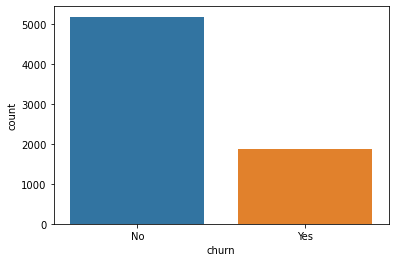

In [10]:
sns.countplot(x='Churn',data=dataframe) #checking how many people in the total dataset are churners
plt.xlabel('churn')

In [11]:
dataframe['Churn'].value_counts()#values counts give the the counts

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
#to find ratio of people who are churners in to total dataset
dataframe['Churn'].value_counts()/len(dataframe['Churn'])*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Data is highly imbalanced , ratio=73:27
so we analyse the data with other features while taking the target values sepeartly to get some insights

In [13]:
dataframe.isnull().sum()#to check null values another way return dwn

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
dataframe.info(verbose=True)#to check count of null values same as above statement

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C:\Users\pcv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


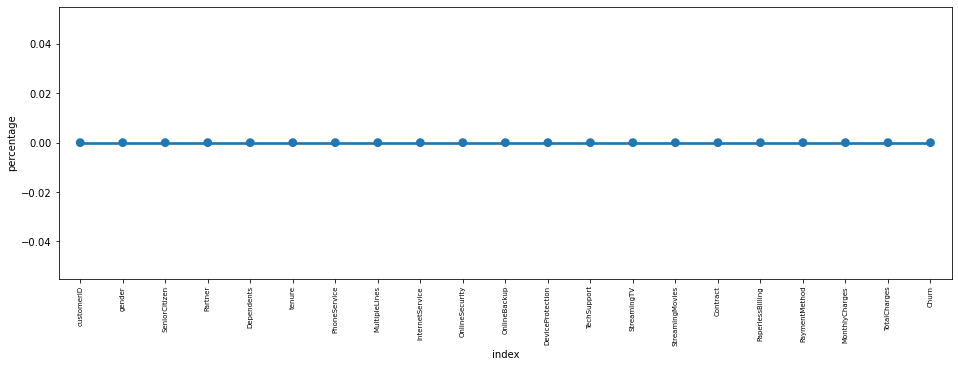

In [15]:
#to get % of missing values
missing=pd.DataFrame((dataframe.isnull().sum())*100/dataframe.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.ylabel("percentage")
plt.show()

# Data Cleaning
1. Create a copy of data for manupulation and processing

In [16]:
data=dataframe.copy()

2. Total Charges should be numeric amount. Lets convert into numeric data type

In [17]:
data.TotalCharges=pd.to_numeric(data.TotalCharges,errors='coerce') #we see 11 missing values in total charges
data.isnull().sum()
#found null values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

4. Missing Value Treatment

since the % of these records compared to total dataset is very low ie 0.15%,it is safe to ignore them from further processing

In [18]:
data.dropna(how='any',inplace=True)
#to fill with 0
#data.fillna(0)

5. Divide customers into bins based on tenure e.g tenure<12 months;assign group if 1-12, for tenure betwwn  1 to 2 ys,tenure group of 13-24;so on

In [19]:
print(data['tenure'].max())#get the max tenure

72


In [20]:
#group the tenure in bins of 12 months
labels=["{} - {}".format(i, i+11) for i in range(1,72,12)]
data['tenure_group']=pd.cut(data.tenure,range(1,80,12),right=False,labels=labels)

In [21]:
data.tenure_group.value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

6. Remove Columns not required for processing

In [22]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn tenure_group  
0    No       1 - 12  
1    No      25 - 36  
2   Yes       1 - 12  
3    No      37 - 48  
4   Yes       1 - 12

In [23]:
data.drop(columns=['customerID','tenure'],axis=1,inplace=True)
data.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges Churn tenure_group  
0           Electronic check           29.85         29.85    No       1 - 12  
1               Mailed check           56.95       1889.50    No      25 - 36  
2               Mailed check           53.85        108.15   Yes       1 - 12  
3  Bank transfer (automatic)           42.30       1840.75    No      37 - 48  
4           Electronic check           70.70        151.65   Yes       1 - 12

# Data Exploration

7.Univariate Analysis

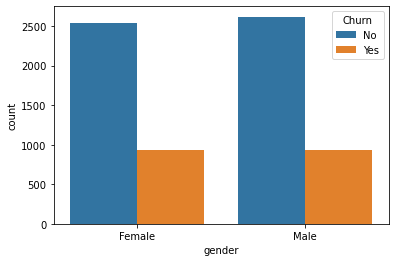

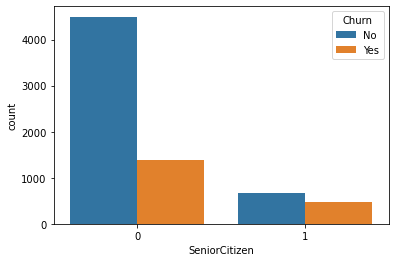

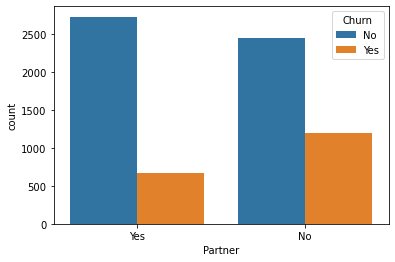

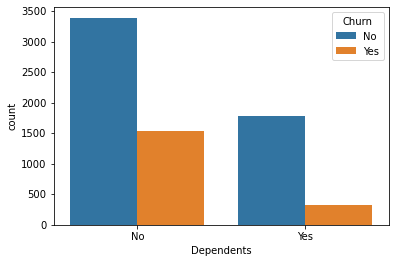

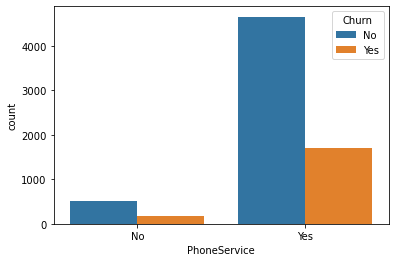

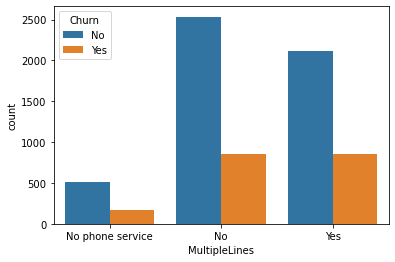

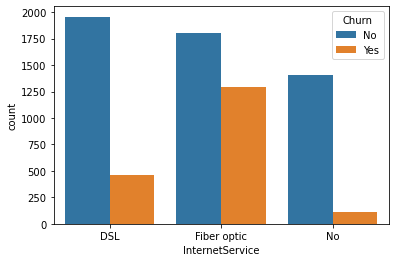

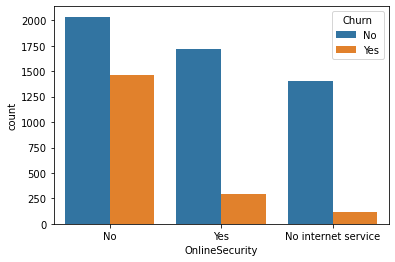

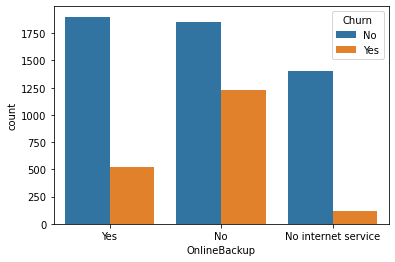

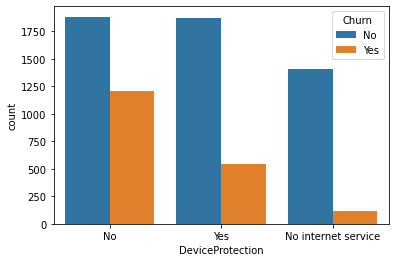

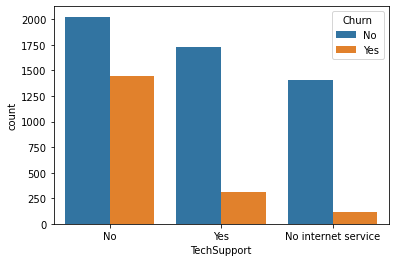

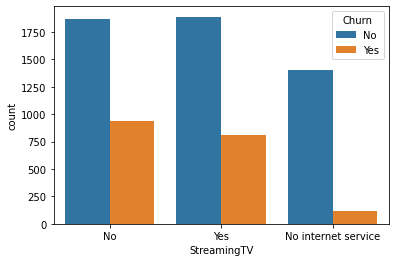

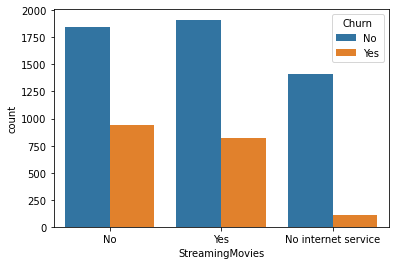

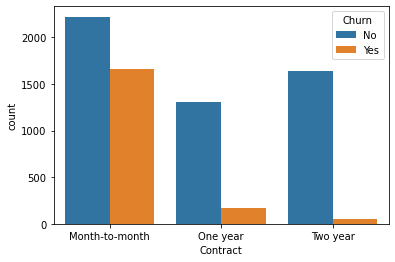

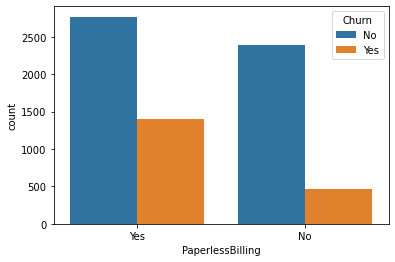

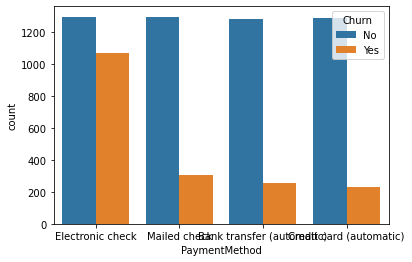

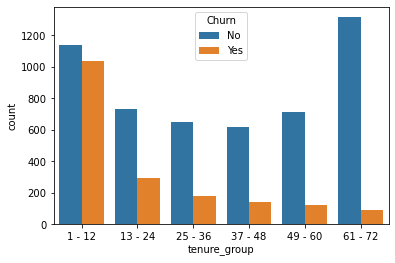

In [24]:

for feature in data.columns:
    if feature not in ['Churn','MonthlyCharges','TotalCharges']:#removing coz monthly and total are continuoes and churn is our dependent feature
        sns.countplot(x=feature,hue='Churn',data=data)
        plt.show()

2.Convert the target variable 'churn' in a binary variable i.e Yes=1;No=0

In [25]:
data['Churn']=np.where(data['Churn']=='Yes',1,0)

In [26]:
data.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges  Churn tenure_group  
0           Electronic check           29.85         29.85      0       1 - 12  
1               Mailed check           56.95       1889.50      0      25 - 36  
2               Mailed check           53.85        108.15      1       1 - 12  
3  Bank transfer (automatic)           42.30       1840.75      0      37 - 48  
4           Electronic check           70.70        151.65      1       1 - 12

3. Convert the all categorical variables to dummy variables

In [27]:
data_dummies=pd.get_dummies(data)
data_dummies.head()

SeniorCitizen  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0           29.85         29.85      0              1   
1              0           56.95       1889.50      0              0   
2              0           53.85        108.15      1              0   
3              0           42.30       1840.75      0              0   
4              0           70.70        151.65      1              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
0            0           0            1              1               0   
1            1           1            0              1               0   
2            1           1            0              1               0   
3            1           1            0              1               0   
4            0           1            0              1               0   

   PhoneService_No  PhoneService_Yes  MultipleLines_No  \
0                1                 0                 0   
1                0                 1                 1   
2                0                 1                 1   
3                1                 0                 0   
4                0                 1                 1   

   MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                               1                  0                    1   
1                               0                  0                    1   
2                               0                  0                    1   
3                               1                  0                    1   
4                               0                  0                    0   

   InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  \
0                            0                   0                  1   
1                            0                   0                  0   
2                            0                   0                  0   
3                            0                   0                  0   
4                            1                   0                  1   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  \
0                                   0                   0                0   
1                                   0                   1                1   
2                                   0                   1                0   
3                                   0                   1                1   
4                                   0                   0                1   

   OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No  \
0                                 0                 1                    1   
1                                 0                 0                    0   
2                                 0                 1                    1   
3                                 0                 0                    0   
4                                 0                 0                    1   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                     0                     0               1   
1                                     0                     1               1   
2                                     0                     0               1   
3                                     0                     1               0   
4                                     0                     0               1   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                                0                0               1   
1                                0                0               1   
2                                0                0               1   
3                                0                1               1   
4                                0                0               1   

   StreamingTV_No inte

In [28]:
data_dummies.shape

(7032, 51)

8.Relationship between Monthly Charges and Total Charges

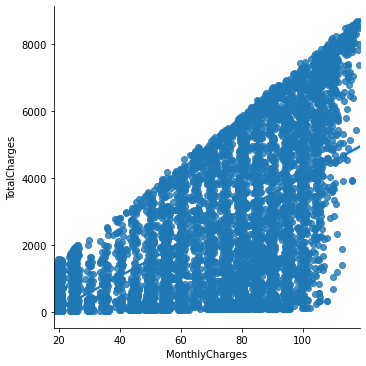

In [29]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=data)

Total Charges increase as Monthly Charges increase -as expected

10. churn by monthly charges and total charges

Text(0.5, 1.0, 'Monthly charges by churn')

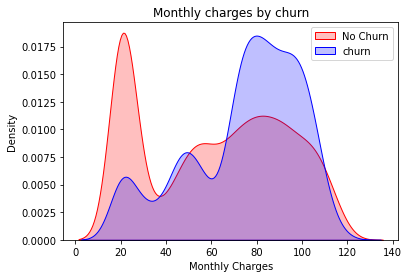

In [30]:
Mth=sns.kdeplot(data.MonthlyCharges[(data['Churn'] == 0 )],
               color='Red',shade=True)
Mth=sns.kdeplot(data.MonthlyCharges[(data['Churn']==1)],
                ax=Mth,color='Blue',shade=True)
Mth.legend(["No Churn","churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

<AxesSubplot:>

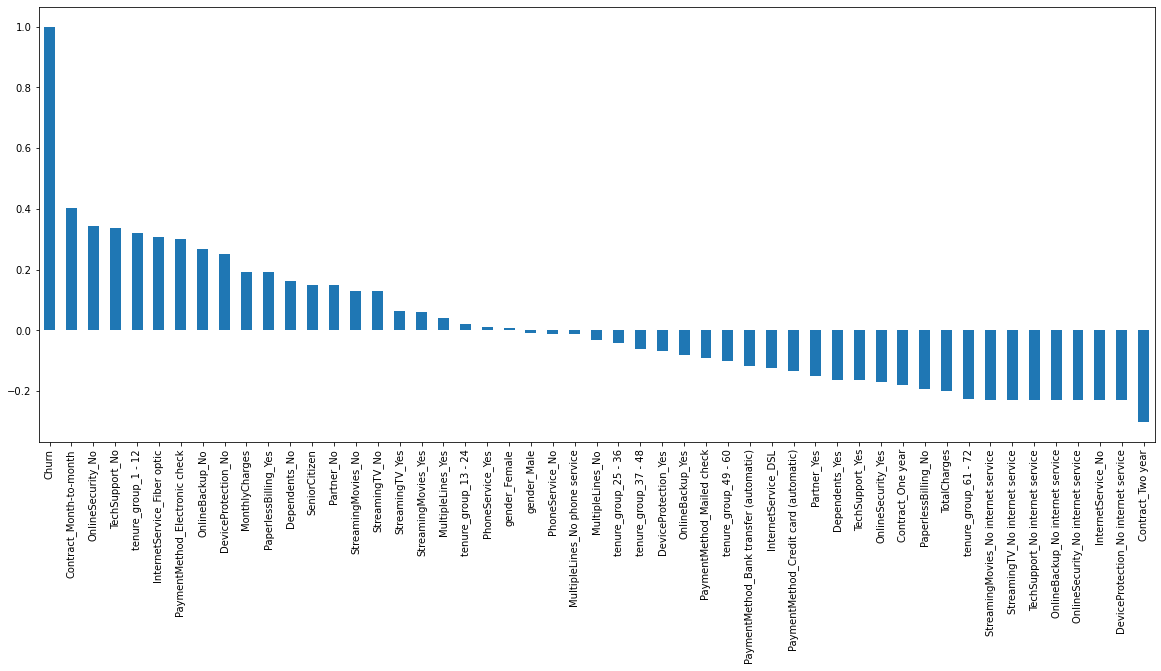

In [31]:
plt.figure(figsize=(20,8))
data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

*Derivied Insight*

High Churn seen in case of Month to month contracts, No online Security, No tech Support, First year of subscrition and fibre optics Internet
Low Churn in seen in case of LongTerm contracts, Subscrition without internet service and the customers engaged for 5 + years
Factors like Gender, Availability of Phone Service and of mutiple lines have amost No impact on churn
This is also evident from thr HeatMap  below

<AxesSubplot:>

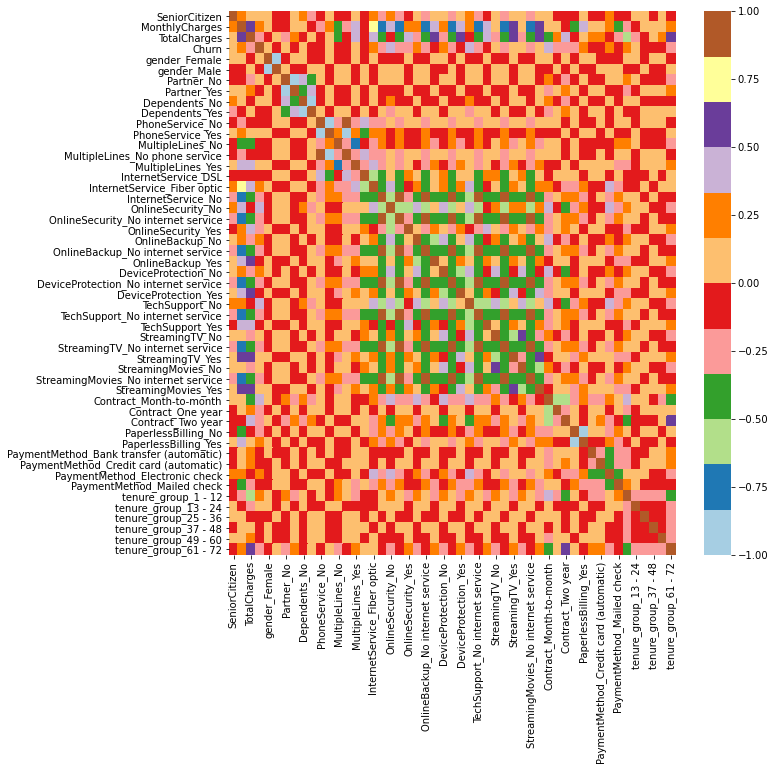

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(data_dummies.corr(),cmap='Paired')

In [33]:
data_dummies.to_csv('tel_churn.csv')